In [13]:
import sys
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [2]:
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

In [5]:
database = '/media/extra/DATA/NATL60/NATL60-CJM165-S/'
mldfiles = sorted(glob.glob(database + 'MXL/NATL60-CJM165_y2*_somxl010.nc'))
gradbfiles = sorted(glob.glob(database + 'hgrad-large-scale/NATL60-CJM165_y2*_hgradb_large_scale.nc'))

In [6]:
len(mldfiles),len(gradbfiles)

(365, 365)

In [11]:
time_counter=xr.open_mfdataset(mldfiles)['time_counter']

In [7]:
def get_values_in_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    values = data[jmin:jmax+1,imin:imax+1]
    return values


In [8]:
def Estimate_wb(box,mld,gradb):
    mld_box = get_values_in_box(box,mld)
    gradb_box = get_values_in_box(box,gradb)    
    # - compute average
    avg_mld_box = mld_box.mean()
    avg_gradb_box = gradb_box.mean()
    # - compute w'b'
    wb_box = (avg_mld_box*avg_gradb_box)**2
    return wb_box

In [9]:
def get_wb_in_boxes(mldfiles,gradbfiles):
    global boxes
    _Ann_wb_arr = []
    for i in range(len(gradbfiles)): 
        if i%30 == 0: print mldfiles[i]
        mld = xr.open_dataset(mldfiles[i])['somxl010']
        gradb = xr.open_dataset(gradbfiles[i])['vohgradb']
        mld = mld.squeeze() ; gradb = gradb.squeeze();
        _wb_arr = []
        for box in boxes:
            wb = Estimate_wb(box,mld,gradb)
            _wb_arr.append(wb)
        wb_arr = np.array(_wb_arr)
        _Ann_wb_arr.append(wb_arr)
    Ann_wb_arr = np.array(_Ann_wb_arr)
    return Ann_wb_arr

In [10]:
wb_boxes_yr = get_wb_in_boxes(mldfiles,gradbfiles)

/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2012m10d01.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2012m10d31.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2012m11d30.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2012m12d30.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m01d29.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m02d28.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m03d30.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m04d29.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m05d29.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m06d28.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJM165_y2013m07d28.1d_somxl010.nc
/media/extra/DATA/NATL60/NATL60-CJM165-S/MXL/NATL60-CJ

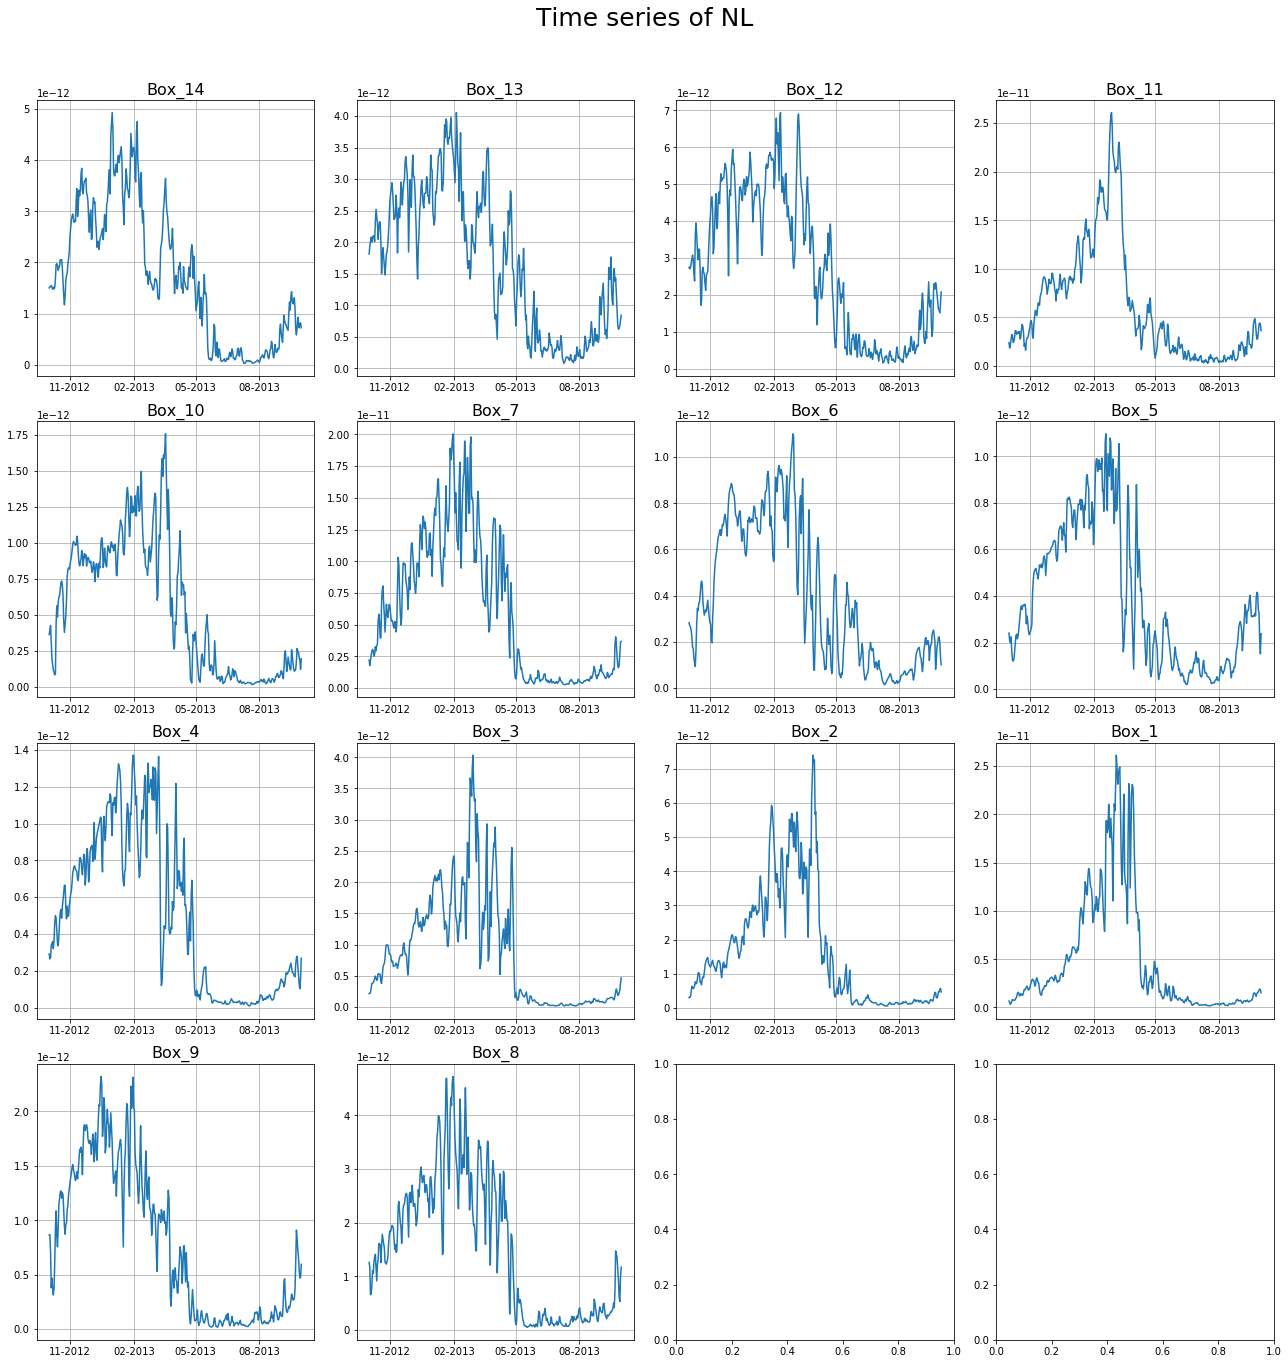

In [14]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Time series of NL'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(time_counter,wb_boxes_yr[:,k])
    axs[i].set_title(box.name,size=16)
    axs[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    axs[i].grid(True)
    #axs[i].set_xticklabels(labels)
    i = i + 1
    fig.tight_layout()